In [728]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [729]:
test = pd.read_csv('Test.csv')
test

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,CustomerId_412,2019-07-16 00:18:46,500.0,-500.0,TransactionId_680,BatchId_2079,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_1,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
901,CustomerId_326,2019-07-16 03:17:01,1000.0,-1000.0,TransactionId_2504,BatchId_1432,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
902,CustomerId_497,2019-07-16 15:06:22,1000.0,-1000.0,TransactionId_995,BatchId_1410,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN
903,CustomerId_497,2019-07-16 15:09:58,800.0,-800.0,TransactionId_708,BatchId_1343,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN


In [730]:
train = pd.read_csv('Train.csv')
train

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [731]:
test.isnull().sum() #checking nulls

#HANDLING NULLS
test_drop = cols_to_check = [
    "IssuedDateLoan",
    "LoanId",
    "InvestorId",
    "LoanApplicationId",
    "ThirdPartyId"
]

test_drop = test.dropna(subset=cols_to_check)
test_drop

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,CustomerId_122,2019-07-11 12:57:48,2660.0,-2000.0,TransactionId_928,BatchId_866,SubscriptionId_3,UGX,256,ProviderId_1,ProductId_15,utility_bill,ChannelId_1,1,2019-07-11 12:57:47,LoanId_630,InvestorId_2,LoanApplicationId_245,ThirdPartyId_293
880,CustomerId_269,2019-07-11 13:04:42,14590.0,-13000.0,TransactionId_1162,BatchId_1346,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_15,utility_bill,ChannelId_1,1,2019-07-11 13:04:41,LoanId_1512,InvestorId_1,LoanApplicationId_831,ThirdPartyId_1375
883,CustomerId_199,2019-07-12 03:50:53,1000.0,-1000.0,TransactionId_960,BatchId_2523,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-07-12 03:50:52,LoanId_270,InvestorId_1,LoanApplicationId_521,ThirdPartyId_1388
894,CustomerId_138,2019-07-13 18:15:09,2000.0,-2000.0,TransactionId_1321,BatchId_1280,SubscriptionId_3,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-07-13 18:15:08,LoanId_1445,InvestorId_2,LoanApplicationId_44,ThirdPartyId_1318


In [732]:
test_drop.isnull().sum()

,0
CustomerId,0
TransactionStartTime,0
Value,0
Amount,0
TransactionId,0
BatchId,0
SubscriptionId,0
CurrencyCode,0
CountryCode,0
ProviderId,0


In [733]:
train.isnull().sum() #checking nulls

#DROPPING NULLS ON CERTAIN COLUMNS
train_drop = columns_to_check = [
    "IssuedDateLoan","AmountLoan",
    "Currency","LoanId",
    "PaidOnDate","IsFinalPayBack",
    "InvestorId","DueDate",
    "LoanApplicationId",
    "PayBackId",
    "ThirdPartyId",
    "IsThirdPartyConfirmed",
    "IsDefaulted"
]

train_drop = train.dropna(subset=columns_to_check)
train_drop

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_317,2018-10-30 06:49:57,1.0,InvestorId_3,2018-11-21 16:03:32,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1619,2018-10-23 13:18:42,1.0,InvestorId_2,2018-11-22 13:12:16,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1438,2018-10-23 15:26:58,1.0,InvestorId_2,2018-11-22 15:20:53,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1304,2018-10-24 06:38:49,1.0,InvestorId_2,2018-11-23 06:33:57,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1436,2018-10-24 07:01:48,1.0,InvestorId_2,2018-11-23 06:55:58,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [734]:
train_drop.isnull().sum()

,0
CustomerId,0
TransactionStartTime,0
Value,0
Amount,0
TransactionId,0
BatchId,0
SubscriptionId,0
CurrencyCode,0
CountryCode,0
ProviderId,0


In [735]:
#REMOVING DUPLICATES
train_new = train_drop.drop_duplicates()
train_new

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_317,2018-10-30 06:49:57,1.0,InvestorId_3,2018-11-21 16:03:32,LoanApplicationId_1629,PayBackId_1719,ThirdPartyId_1010,0.0,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1619,2018-10-23 13:18:42,1.0,InvestorId_2,2018-11-22 13:12:16,LoanApplicationId_136,PayBackId_725,ThirdPartyId_1566,0.0,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1438,2018-10-23 15:26:58,1.0,InvestorId_2,2018-11-22 15:20:53,LoanApplicationId_1171,PayBackId_1085,ThirdPartyId_1265,0.0,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1304,2018-10-24 06:38:49,1.0,InvestorId_2,2018-11-23 06:33:57,LoanApplicationId_702,PayBackId_763,ThirdPartyId_1962,0.0,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,UGX,256,ProviderId_1,...,LoanId_1436,2018-10-24 07:01:48,1.0,InvestorId_2,2018-11-23 06:55:58,LoanApplicationId_508,PayBackId_1228,ThirdPartyId_2008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [736]:
xt = test_drop.drop_duplicates()
xt

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,CustomerId_122,2019-07-11 12:57:48,2660.0,-2000.0,TransactionId_928,BatchId_866,SubscriptionId_3,UGX,256,ProviderId_1,ProductId_15,utility_bill,ChannelId_1,1,2019-07-11 12:57:47,LoanId_630,InvestorId_2,LoanApplicationId_245,ThirdPartyId_293
880,CustomerId_269,2019-07-11 13:04:42,14590.0,-13000.0,TransactionId_1162,BatchId_1346,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_15,utility_bill,ChannelId_1,1,2019-07-11 13:04:41,LoanId_1512,InvestorId_1,LoanApplicationId_831,ThirdPartyId_1375
883,CustomerId_199,2019-07-12 03:50:53,1000.0,-1000.0,TransactionId_960,BatchId_2523,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-07-12 03:50:52,LoanId_270,InvestorId_1,LoanApplicationId_521,ThirdPartyId_1388
894,CustomerId_138,2019-07-13 18:15:09,2000.0,-2000.0,TransactionId_1321,BatchId_1280,SubscriptionId_3,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-07-13 18:15:08,LoanId_1445,InvestorId_2,LoanApplicationId_44,ThirdPartyId_1318


In [737]:
#DROPPING FEATURES SO THE DATASETS ARE EQUAL

x = train_new.drop(["AmountLoan","Currency","PaidOnDate","IsFinalPayBack",
                        "DueDate","PayBackId","IsThirdPartyConfirmed"], axis =1 )
x

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId,IsDefaulted
15,CustomerId_233,2018-10-22 16:04:25,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-22 16:04:22,LoanId_317,InvestorId_3,LoanApplicationId_1629,ThirdPartyId_1010,0.0
17,CustomerId_305,2018-10-23 13:12:23,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-23 13:12:21,LoanId_1619,InvestorId_2,LoanApplicationId_136,ThirdPartyId_1566,0.0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-23 15:20:55,LoanId_1438,InvestorId_2,LoanApplicationId_1171,ThirdPartyId_1265,0.0
19,CustomerId_27,2018-10-23 15:31:27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-24 06:34:00,LoanId_1304,InvestorId_2,LoanApplicationId_702,ThirdPartyId_1962,0.0
20,CustomerId_27,2018-10-24 06:56:02,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_4,data_bundles,ChannelId_1,1,2018-10-24 06:56:00,LoanId_1436,InvestorId_2,LoanApplicationId_508,ThirdPartyId_2008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-30 21:55:10,LoanId_293,InvestorId_1,LoanApplicationId_524,ThirdPartyId_857,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-30 23:54:06,LoanId_1040,InvestorId_1,LoanApplicationId_1441,ThirdPartyId_958,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,1,2019-03-31 05:40:09,LoanId_1585,InvestorId_1,LoanApplicationId_1466,ThirdPartyId_1981,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 09:37:18,LoanId_1314,InvestorId_1,LoanApplicationId_1389,ThirdPartyId_705,0.0


In [738]:
y = train_new['IsDefaulted'].astype(int) #DISPLAYING Y
y[y == 1] #checking classes

,IsDefaulted
26,1
37,1
202,1
220,1
221,1
...,...
1846,1
1847,1
1848,1
1849,1


In [739]:
unlinked = pd.read_csv('unlinked_masked_final.csv')
unlinked

,TransactionId,BatchId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
0,TransactionId_18876,BatchId_7899,CustomerId_250,UGX,256,ProviderId_2,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,BatchId_8829,CustomerId_423,UGX,256,ProviderId_5,ProductId_7,airtime,ChannelId_3,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,BatchId_15250,CustomerId_423,UGX,256,ProviderId_2,ProductId_10,financial_services,ChannelId_3,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,BatchId_5171,CustomerId_193,UGX,256,ProviderId_5,ProductId_1,airtime,ChannelId_3,5000.0,5000.0,30/6/19 19:11:01
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,TransactionId_11472,BatchId_12998,CustomerId_282,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,1/1/19 6:28:43
16323,TransactionId_18689,BatchId_10292,CustomerId_282,UGX,256,ProviderId_5,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,1/1/19 5:10:25
16324,TransactionId_17879,BatchId_16972,CustomerId_282,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,1/1/19 4:54:08
16325,TransactionId_6532,BatchId_11541,CustomerId_180,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,1/1/19 0:46:25


In [740]:
var = pd.read_csv('VariableDefinitions.csv')
var

,Variable,Definition
0,CustomerId,Unique number identifying the customer on plat...
1,TransactionStartTime,Transaction start time
2,Value,Value of transaction
3,Amount,Value of Transaction with charges
4,TransactionId,Unique transaction identifier on platform
5,BatchId,Identifier for bulk transactions being done on...
6,SubscriptionId,You can have one account with multiple subscri...
7,CurrencyCode,Country currency
8,CountryCode,Numerical geographical code of country
9,ProviderId,Source provider of Item bought


In [741]:
#fixing inconsistent formats

x['IssuedDateLoan'] = pd.to_datetime(x['IssuedDateLoan'],errors='coerce')
x['IssuedDateLoan_year'] = x['IssuedDateLoan'].dt.year
x['IssuedDateLoan_month'] = x['IssuedDateLoan'].dt.month
x['IssuedDateLoan_day'] = x['IssuedDateLoan'].dt.day
x['IssuedDateLoan_time'] = x['IssuedDateLoan'].dt.time
x['IssuedDateLoan_hour'] = x['IssuedDateLoan'].dt.hour


x['TransactionStartTime'] = pd.to_datetime(x['TransactionStartTime'],errors='coerce')
x['TransactionStartTime_year'] = x['TransactionStartTime'].dt.year
x['TransactionStartTime_month'] = x['TransactionStartTime'].dt.month
x['TransactionStartTime_day'] = x['TransactionStartTime'].dt.day
x['TransactionStartTime_time'] = x['TransactionStartTime'].dt.time
x['TransactionStartTime_hour'] = x['TransactionStartTime'].dt.hour

x.drop(['IssuedDateLoan','TransactionStartTime'], axis=1, inplace=True)
x

,CustomerId,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,IssuedDateLoan_year,IssuedDateLoan_month,IssuedDateLoan_day,IssuedDateLoan_time,IssuedDateLoan_hour,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_time,TransactionStartTime_hour
15,CustomerId_233,5000.0,-5000.0,TransactionId_2632,BatchId_775,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,2018,10,22,16:04:22,16,2018,10,22,16:04:25,16
17,CustomerId_305,500.0,-500.0,TransactionId_1297,BatchId_2016,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,...,2018,10,23,13:12:21,13,2018,10,23,13:12:23,13
18,CustomerId_27,1000.0,-1000.0,TransactionId_1367,BatchId_1675,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,...,2018,10,23,15:20:55,15,2018,10,23,15:20:58,15
19,CustomerId_27,500.0,-500.0,TransactionId_871,BatchId_2449,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,...,2018,10,24,06:34:00,6,2018,10,23,15:31:27,15
20,CustomerId_27,500.0,-500.0,TransactionId_1019,BatchId_1564,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_4,...,2018,10,24,06:56:00,6,2018,10,24,06:56:02,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,...,2019,3,30,21:55:10,21,2019,3,30,21:55:11,21
2096,CustomerId_28,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,...,2019,3,30,23:54:06,23,2019,3,30,23:54:07,23
2097,CustomerId_34,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,...,2019,3,31,05:40:09,5,2019,3,31,05:40:10,5
2098,CustomerId_346,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,...,2019,3,31,09:37:18,9,2019,3,31,09:37:19,9


In [742]:
xt['IssuedDateLoan'] = pd.to_datetime(xt['IssuedDateLoan'],errors='coerce')
xt['IssuedDateLoan_year'] = xt['IssuedDateLoan'].dt.year
xt['IssuedDateLoan_month'] = xt['IssuedDateLoan'].dt.month
xt['IssuedDateLoan_day'] = xt['IssuedDateLoan'].dt.day
xt['IssuedDateLoan_time'] = xt['IssuedDateLoan'].dt.time
xt['IssuedDateLoan_hour'] = xt['IssuedDateLoan'].dt.hour


xt['TransactionStartTime'] = pd.to_datetime(xt['TransactionStartTime'],errors='coerce')
xt['TransactionStartTime_year'] = xt['TransactionStartTime'].dt.year
xt['TransactionStartTime_month'] = xt['TransactionStartTime'].dt.month
xt['TransactionStartTime_day'] = xt['TransactionStartTime'].dt.day
xt['TransactionStartTime_time'] = xt['TransactionStartTime'].dt.time
xt['TransactionStartTime_hour'] = xt['TransactionStartTime'].dt.hour

xt.drop(['IssuedDateLoan','TransactionStartTime'], axis=1, inplace=True)
xt

,CustomerId,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,IssuedDateLoan_year,IssuedDateLoan_month,IssuedDateLoan_day,IssuedDateLoan_time,IssuedDateLoan_hour,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_time,TransactionStartTime_hour
0,CustomerId_310,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,...,2019,3,31,13:33:04,13,2019,3,31,13:33:05,13
1,CustomerId_243,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,...,2019,3,31,15:04:08,15,2019,3,31,15:04:09,15
2,CustomerId_142,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,...,2019,3,31,17:31:09,17,2019,3,31,17:31:11,17
3,CustomerId_142,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,...,2019,3,31,17:32:14,17,2019,3,31,17:32:15,17
4,CustomerId_142,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,...,2019,3,31,17:34:40,17,2019,3,31,17:34:41,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,CustomerId_122,2660.0,-2000.0,TransactionId_928,BatchId_866,SubscriptionId_3,UGX,256,ProviderId_1,ProductId_15,...,2019,7,11,12:57:47,12,2019,7,11,12:57:48,12
880,CustomerId_269,14590.0,-13000.0,TransactionId_1162,BatchId_1346,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_15,...,2019,7,11,13:04:41,13,2019,7,11,13:04:42,13
883,CustomerId_199,1000.0,-1000.0,TransactionId_960,BatchId_2523,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_3,...,2019,7,12,03:50:52,3,2019,7,12,03:50:53,3
894,CustomerId_138,2000.0,-2000.0,TransactionId_1321,BatchId_1280,SubscriptionId_3,UGX,256,ProviderId_1,ProductId_3,...,2019,7,13,18:15:08,18,2019,7,13,18:15:09,18


In [743]:
#Outlier treatment (IQR method) detecting

# Q1 = x['Amount'].quantile(0.25)
# Q3 = x['Amount'].quantile(0.75)
# IQR = Q3 - Q1

# df = x[(x['Amount'] >= Q1 - 1.5*IQR) &
#         (x['Amount'] <= Q3 + 1.5*IQR)]
# df

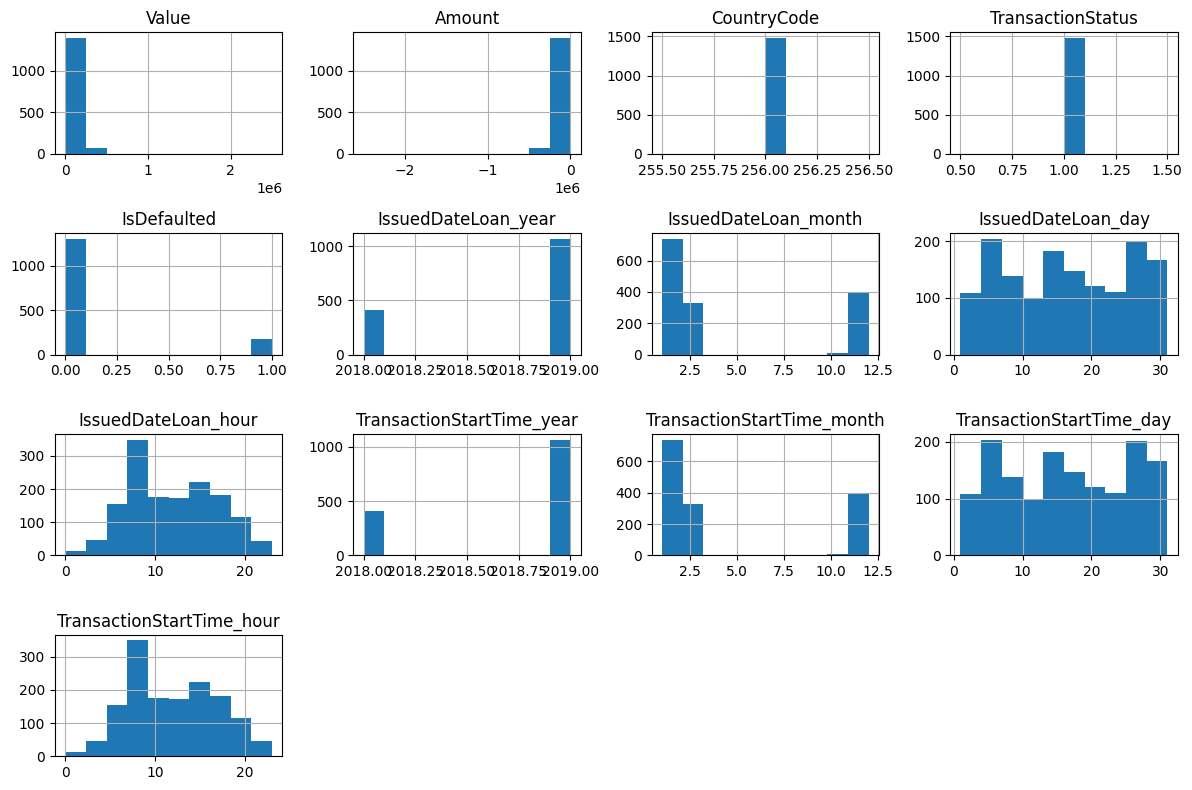

In [744]:
#feature distributions
import matplotlib.pyplot as plt

x.hist(figsize=(12, 8))          # sets figure size
plt.tight_layout()                # avoids overlapping labels
plt.show()

In [745]:
x.drop(['CustomerId','CurrencyCode','CountryCode','ChannelId','TransactionId','BatchId','SubscriptionId','ProviderId','ProductId','LoanId','InvestorId','LoanApplicationId','ThirdPartyId','IssuedDateLoan_time','TransactionStartTime_time','TransactionStatus'], axis=1, inplace = True)
x

,Value,Amount,ProductCategory,IsDefaulted,IssuedDateLoan_year,IssuedDateLoan_month,IssuedDateLoan_day,IssuedDateLoan_hour,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_hour
15,5000.0,-5000.0,airtime,0.0,2018,10,22,16,2018,10,22,16
17,500.0,-500.0,airtime,0.0,2018,10,23,13,2018,10,23,13
18,1000.0,-1000.0,airtime,0.0,2018,10,23,15,2018,10,23,15
19,500.0,-500.0,airtime,0.0,2018,10,24,6,2018,10,23,15
20,500.0,-500.0,data_bundles,0.0,2018,10,24,6,2018,10,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,data_bundles,0.0,2019,3,30,21,2019,3,30,21
2096,5000.0,-5000.0,airtime,0.0,2019,3,30,23,2019,3,30,23
2097,5000.0,-5000.0,airtime,0.0,2019,3,31,5,2019,3,31,5
2098,1500.0,-1500.0,data_bundles,0.0,2019,3,31,9,2019,3,31,9


In [746]:
#label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x["ProductCategory"] = le.fit_transform(x["ProductCategory"])
x

,Value,Amount,ProductCategory,IsDefaulted,IssuedDateLoan_year,IssuedDateLoan_month,IssuedDateLoan_day,IssuedDateLoan_hour,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_hour
15,5000.0,-5000.0,0,0.0,2018,10,22,16,2018,10,22,16
17,500.0,-500.0,0,0.0,2018,10,23,13,2018,10,23,13
18,1000.0,-1000.0,0,0.0,2018,10,23,15,2018,10,23,15
19,500.0,-500.0,0,0.0,2018,10,24,6,2018,10,23,15
20,500.0,-500.0,1,0.0,2018,10,24,6,2018,10,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,1,0.0,2019,3,30,21,2019,3,30,21
2096,5000.0,-5000.0,0,0.0,2019,3,30,23,2019,3,30,23
2097,5000.0,-5000.0,0,0.0,2019,3,31,5,2019,3,31,5
2098,1500.0,-1500.0,1,0.0,2019,3,31,9,2019,3,31,9


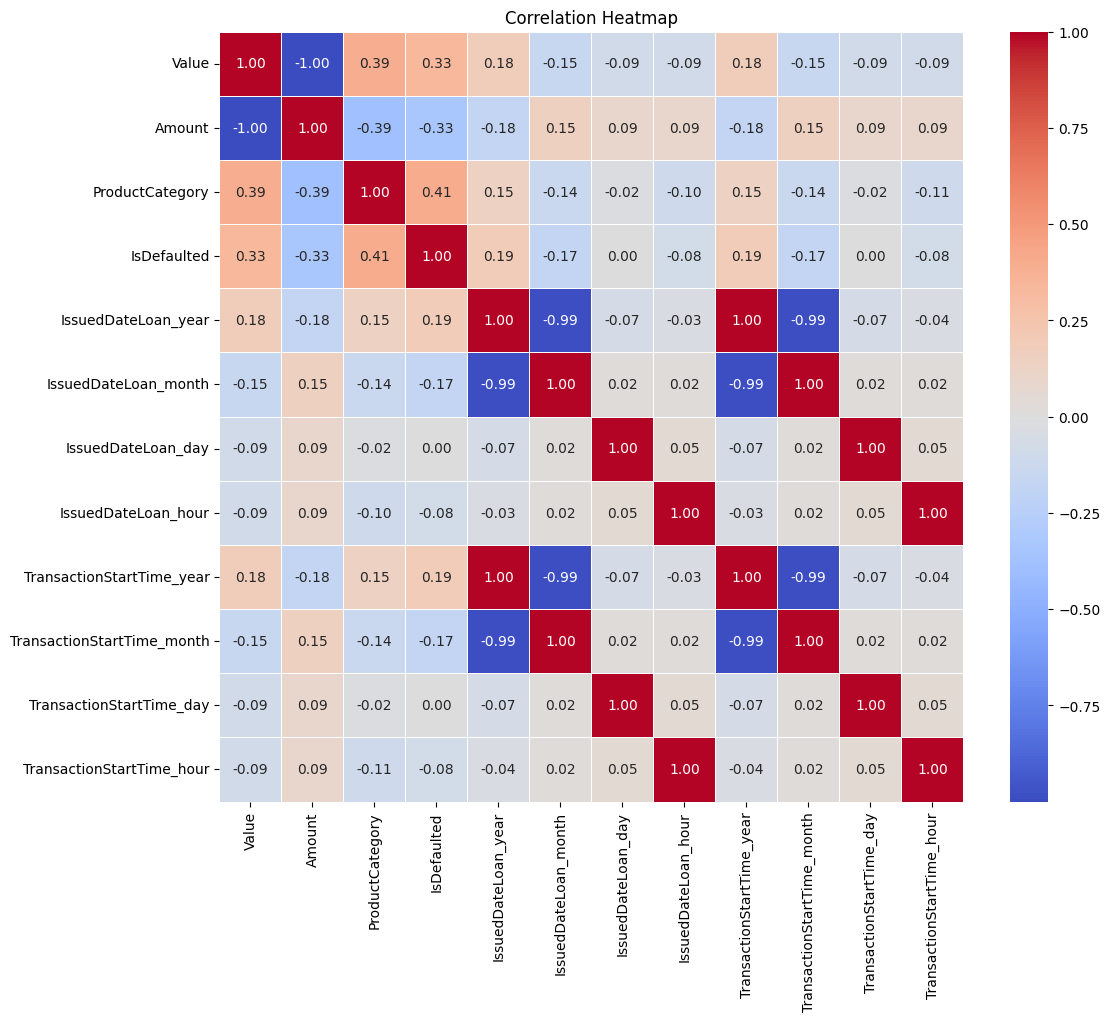

In [747]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = x.corr()

plt.figure(figsize=(12,10))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [748]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 15 to 2099
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Value                       1479 non-null   float64
 1   Amount                      1479 non-null   float64
 2   ProductCategory             1479 non-null   int64  
 3   IsDefaulted                 1479 non-null   float64
 4   IssuedDateLoan_year         1479 non-null   int32  
 5   IssuedDateLoan_month        1479 non-null   int32  
 6   IssuedDateLoan_day          1479 non-null   int32  
 7   IssuedDateLoan_hour         1479 non-null   int32  
 8   TransactionStartTime_year   1479 non-null   int32  
 9   TransactionStartTime_month  1479 non-null   int32  
 10  TransactionStartTime_day    1479 non-null   int32  
 11  TransactionStartTime_hour   1479 non-null   int32  
dtypes: float64(3), int32(8), int64(1)
memory usage: 136.3 KB


In [749]:
features = x.drop(['Amount','TransactionStartTime_month','TransactionStartTime_day','TransactionStartTime_hour','TransactionStartTime_year','IsDefaulted'], axis = 1)
features

,Value,ProductCategory,IssuedDateLoan_year,IssuedDateLoan_month,IssuedDateLoan_day,IssuedDateLoan_hour
15,5000.0,0,2018,10,22,16
17,500.0,0,2018,10,23,13
18,1000.0,0,2018,10,23,15
19,500.0,0,2018,10,24,6
20,500.0,1,2018,10,24,6
...,...,...,...,...,...,...
2095,2000.0,1,2019,3,30,21
2096,5000.0,0,2019,3,30,23
2097,5000.0,0,2019,3,31,5
2098,1500.0,1,2019,3,31,9


In [750]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test

(         Value  ProductCategory  IssuedDateLoan_year  IssuedDateLoan_month  \
 581     5000.0                1                 2018                    12   
 671     2000.0                0                 2019                     1   
 831     5750.0                6                 2019                     1   
 1704  192000.0                4                 2019                     3   
 729    10000.0                0                 2019                     1   
 ...        ...              ...                  ...                   ...   
 1642   10000.0                0                 2019                     2   
 1852    1000.0                0                 2019                     3   
 1201     500.0                0                 2019                     2   
 2076    4720.0                6                 2019                     3   
 1638    6000.0                0                 2019                     2   
 
       IssuedDateLoan_day  IssuedDateLoan_hour  
 

In [751]:
#Train single advanced models

rf = RandomForestClassifier(n_estimators=10, max_depth=200, random_state=42)

fitting_rf = rf.fit(x_train, y_train)
predicting_rf = fitting_rf.predict(x_test)
predicting_rf

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicting_rf))
print(classification_report(y_test, predicting_rf))


Confusion Matrix:
 [[249  13]
 [  8  26]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       262
           1       0.67      0.76      0.71        34

    accuracy                           0.93       296
   macro avg       0.82      0.86      0.84       296
weighted avg       0.93      0.93      0.93       296



In [752]:
dt = DecisionTreeClassifier(random_state=42)

fitting_dt = dt.fit(x_train, y_train)
predicting_dt = fitting_dt.predict(x_test)
predicting_dt

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicting_dt))
print(classification_report(y_test, predicting_dt))


Confusion Matrix:
 [[246  16]
 [  7  27]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       262
           1       0.63      0.79      0.70        34

    accuracy                           0.92       296
   macro avg       0.80      0.87      0.83       296
weighted avg       0.93      0.92      0.93       296



In [753]:
lr = LogisticRegression()

fitting_lr = lr.fit(x_train, y_train)
predicting_lr = fitting_lr.predict(x_test)
predicting_lr

print("\nConfusion Matrix:\n", confusion_matrix(y_test, predicting_lr))
print(classification_report(y_test, predicting_lr))


Confusion Matrix:
 [[260   2]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       262
           1       0.00      0.00      0.00        34

    accuracy                           0.88       296
   macro avg       0.44      0.50      0.47       296
weighted avg       0.78      0.88      0.83       296



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [754]:
#Class imbalance
x['IsDefaulted'].value_counts()

,count
IsDefaulted,
0.0,1303
1.0,176


In [755]:
# #Downsample and upsample train dataset

from sklearn.utils import resample


train_df = pd.concat([x_train, y_train], axis=1)

df_majority = train_df[train_df.IsDefaulted==0]
df_minority = train_df[train_df.IsDefaulted==1]


#Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,
                                 n_samples=400,
                                 random_state=123)
#Upsampling the least minority class
df_minority_up = resample(df_minority,
                        replace=True,
                        n_samples=350,
                        random_state=123)



df_resampled = pd.concat([df_majority_downsampled,df_minority_up])

y_train_sampled = df_resampled.IsDefaulted
x_train_sampled= df_resampled.drop('IsDefaulted', axis=1)

df_resampled.IsDefaulted.value_counts()

,count
IsDefaulted,
0,400
1,350


In [756]:
rf = RandomForestClassifier(n_estimators=10, max_depth=200, random_state=42)

fit_rf = rf.fit(x_train_sampled, y_train_sampled)
y_pred_rf = fit_rf.predict(x_test)
y_pred_rf

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[242  20]
 [  3  31]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       262
           1       0.61      0.91      0.73        34

    accuracy                           0.92       296
   macro avg       0.80      0.92      0.84       296
weighted avg       0.94      0.92      0.93       296



In [757]:
dt = DecisionTreeClassifier(random_state=42)

fit_dt = dt.fit(x_train_sampled, y_train_sampled)
y_pred_dt = fit_dt.predict(x_test)
y_pred_dt

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Confusion Matrix:
 [[235  27]
 [  3  31]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       262
           1       0.53      0.91      0.67        34

    accuracy                           0.90       296
   macro avg       0.76      0.90      0.81       296
weighted avg       0.94      0.90      0.91       296



In [758]:
lr = LogisticRegression()

fit_lr = lr.fit(x_train_sampled, y_train_sampled)
y_pred_lr = fit_lr.predict(x_test)
y_pred_lr

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Confusion Matrix:
 [[230  32]
 [  4  30]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       262
           1       0.48      0.88      0.62        34

    accuracy                           0.88       296
   macro avg       0.73      0.88      0.78       296
weighted avg       0.93      0.88      0.89       296



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [759]:
#SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
x_train_res, y_train_res

(              Value  ProductCategory  IssuedDateLoan_year  \
 0       5000.000000                1                 2018   
 1       2000.000000                0                 2019   
 2       5750.000000                6                 2019   
 3     192000.000000                4                 2019   
 4      10000.000000                0                 2019   
 ...             ...              ...                  ...   
 2077  342000.000000                4                 2019   
 2078  192000.000000                4                 2019   
 2079  192000.000000                4                 2019   
 2080    3768.412927                0                 2019   
 2081  342000.000000                4                 2019   
 
       IssuedDateLoan_month  IssuedDateLoan_day  IssuedDateLoan_hour  
 0                       12                  30                   18  
 1                        1                  11                    9  
 2                        1              

In [760]:
y_train_res.value_counts(normalize = True)

,proportion
IsDefaulted,
0,0.5
1,0.5


In [761]:
rf = RandomForestClassifier(n_estimators=10, max_depth=200, random_state=42)

fit_smote_rf = rf.fit(x_train_res, y_train_res)
pred_rf = fit_smote_rf.predict(x_test)
pred_rf

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


Confusion Matrix:
 [[244  18]
 [  3  31]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       262
           1       0.63      0.91      0.75        34

    accuracy                           0.93       296
   macro avg       0.81      0.92      0.85       296
weighted avg       0.95      0.93      0.93       296



In [762]:
dt = DecisionTreeClassifier(random_state=42)

fit_smote_dt = dt.fit(x_train_res, y_train_res)
pred_dt = fit_smote_dt.predict(x_test)
pred_dt

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))


Confusion Matrix:
 [[241  21]
 [  3  31]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       262
           1       0.60      0.91      0.72        34

    accuracy                           0.92       296
   macro avg       0.79      0.92      0.84       296
weighted avg       0.94      0.92      0.93       296



In [763]:
lr = LogisticRegression()

fit_smote_lr = lr.fit(x_train_res, y_train_res)
pred_lr = fit_smote_dt.predict(x_test)
pred_lr

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


Confusion Matrix:
 [[241  21]
 [  3  31]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       262
           1       0.60      0.91      0.72        34

    accuracy                           0.92       296
   macro avg       0.79      0.92      0.84       296
weighted avg       0.94      0.92      0.93       296



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [764]:
#BAGGING

rf = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=42) #base_model

bagging = BaggingClassifier(
    estimator=rf,
    n_estimators=50,
    random_state=42)
bagging.fit(x_train, y_train)
pred_bag_rf = bagging.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_bag_rf))
print(classification_report(y_test, pred_bag_rf))


Confusion Matrix:
 [[249  13]
 [  8  26]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       262
           1       0.67      0.76      0.71        34

    accuracy                           0.93       296
   macro avg       0.82      0.86      0.84       296
weighted avg       0.93      0.93      0.93       296



In [765]:
dt = DecisionTreeClassifier(random_state=42) #base model

bagging = BaggingClassifier(
    estimator=dt,
    n_estimators=50,
    random_state=42)
bagging.fit(x_train, y_train)
pred_bag_dt = bagging.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_bag_dt))
print(classification_report(y_test, pred_bag_dt))


Confusion Matrix:
 [[249  13]
 [  7  27]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       262
           1       0.68      0.79      0.73        34

    accuracy                           0.93       296
   macro avg       0.82      0.87      0.85       296
weighted avg       0.94      0.93      0.93       296



In [766]:
lr = LogisticRegression() #base model

bagging = BaggingClassifier(
    estimator=lr,
    n_estimators=50,
    random_state=42)
bagging.fit(x_train, y_train)
pred_bag_lr = bagging.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_bag_lr))
print(classification_report(y_test, pred_bag_lr))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Confusion Matrix:
 [[260   2]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       262
           1       0.00      0.00      0.00        34

    accuracy                           0.88       296
   macro avg       0.44      0.50      0.47       296
weighted avg       0.78      0.88      0.83       296



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [767]:
#STACKING

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")),
    ('dt', DecisionTreeClassifier(random_state=42, class_weight="balanced")),
    ('lr', LogisticRegression(max_iter=1000, class_weight="balanced"))
]

final_estimator = RandomForestClassifier()

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5)
stack_model.fit(x_train, y_train)
y_prediction = stack_model.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_prediction))
print("Classification Report:\n", classification_report(y_test, y_prediction))



Confusion Matrix:
 [[244  18]
 [  3  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       262
           1       0.63      0.91      0.75        34

    accuracy                           0.93       296
   macro avg       0.81      0.92      0.85       296
weighted avg       0.95      0.93      0.93       296



In [768]:
#boosting

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
gbc.fit(x_train, y_train)
pred_y_gbc = gbc.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_y_gbc))
print(classification_report(y_test, pred_y_gbc))


Confusion Matrix:
 [[249  13]
 [  8  26]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       262
           1       0.67      0.76      0.71        34

    accuracy                           0.93       296
   macro avg       0.82      0.86      0.84       296
weighted avg       0.93      0.93      0.93       296



In [769]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # weak learner (stump)
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


Confusion Matrix:
 [[238  24]
 [  4  30]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       262
           1       0.56      0.88      0.68        34

    accuracy                           0.91       296
   macro avg       0.77      0.90      0.81       296
weighted avg       0.93      0.91      0.91       296



In [770]:
#VOTING
# Define models
lr = LogisticRegression(class_weight="balanced", max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# (Hard Voting)
voting_model = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('rf', rf)
    ],
    voting='hard'   # majority voting
)

voting_model.fit(x_train, y_train)

y_pred_hard = voting_model.predict(x_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard))


Confusion Matrix:
 [[244  18]
 [  3  31]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       262
           1       0.63      0.91      0.75        34

    accuracy                           0.93       296
   macro avg       0.81      0.92      0.85       296
weighted avg       0.95      0.93      0.93       296



In [771]:
#soft voting
voting_model = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('rf', rf)
    ],
    voting='soft'   # average probabilities
)

voting_model.fit(x_train, y_train)
y_pred_soft = voting_model.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))


Confusion Matrix:
 [[244  18]
 [  3  31]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       262
           1       0.63      0.91      0.75        34

    accuracy                           0.93       296
   macro avg       0.81      0.92      0.85       296
weighted avg       0.95      0.93      0.93       296



In [772]:
#RANDOM FOREST CLASSIFIER IS OUR FINAL MODEL